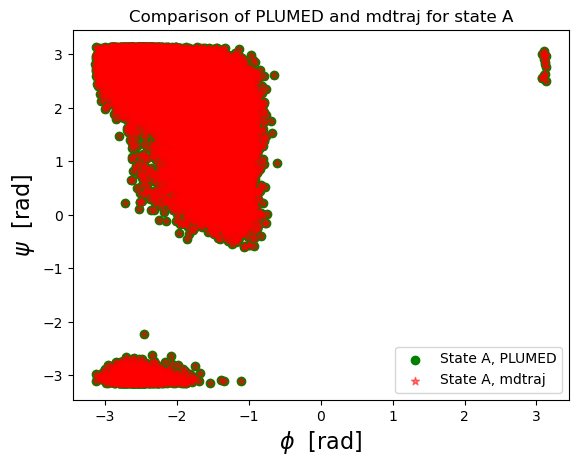

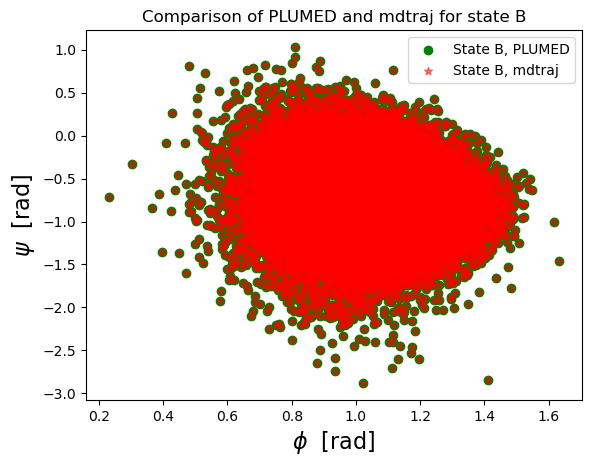

In [239]:
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

# PLUMED

colvar_A = np.loadtxt("unbiased_topolA/topolA_COLVAR",comments=["#","@"],unpack=True)
colvar_B = np.loadtxt("unbiased_topolB/topolB_COLVAR",comments=["#","@"],unpack=True)

# mdtraj

t_A = md.load_xtc('unbiased_topolA/unbiased_topolA.xtc',top='unbiased_topolA/unbiased_topolA.gro')
t_B = md.load_xtc('unbiased_topolB/unbiased_topolB.xtc',top='unbiased_topolB/unbiased_topolB.gro')

phi_A = md.compute_phi(t_A)[1]
psi_A = md.compute_psi(t_A)[1]
phi_B = md.compute_phi(t_B)[1]
psi_B = md.compute_psi(t_B)[1]

plt.figure()
plt.scatter(colvar_A[1],colvar_A[2],color='green', label='State A, PLUMED')
plt.scatter(phi_A,psi_A,color='red',label='State A, mdtraj',marker='*',alpha=0.5)
plt.xlabel(r'$\phi$  [rad]',fontsize=16)
plt.ylabel(r'$\psi$  [rad]',fontsize=16)
plt.title('Comparison of PLUMED and mdtraj for state A')
plt.legend()

plt.savefig('Figures/Comparison_PLUMED_and_mdtraj_A_UNBIASED.jpg')

plt.figure()
plt.scatter(colvar_B[1],colvar_B[2],color='green', label='State B, PLUMED')
plt.scatter(phi_B,psi_B,color='red',label='State B, mdtraj',marker='*',alpha=0.5)
plt.xlabel(r'$\phi$  [rad]',fontsize=16)
plt.ylabel(r'$\psi$  [rad]',fontsize=16)
plt.title('Comparison of PLUMED and mdtraj for state B')
plt.legend()

#time = np.array(t.time)/1000   # in ns
plt.savefig('Figures/Comparison_PLUMED_and_mdtraj_B_UNBIASED.jpg')

In [2]:
sigma_phi_A = np.std(phi_A)
sigma_psi_A = np.std(psi_A)
sigma_phi_B = np.std(phi_B)
sigma_psi_B = np.std(psi_B)

print(sigma_phi_A,sigma_psi_A,sigma_phi_B,sigma_psi_B)

0.5538316 1.024898 0.13238177 0.34453443


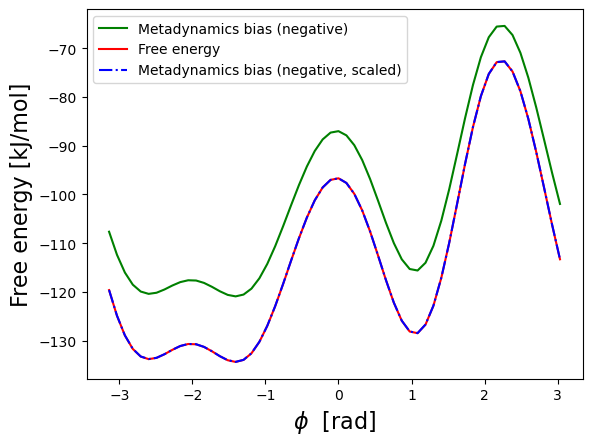

In [12]:
# Lugano exercise 1

phi_grid = np.loadtxt("metadynamics_1/phi.grid.dat",comments=["#","@"],unpack=True)[0]
metad_bias = np.loadtxt("metadynamics_1/phi.grid.dat",comments=["#","@"],unpack=True)[1]

phi_grid_fes = np.loadtxt("metadynamics_1/fes.dat",comments=["#","@"],unpack=True)[0]
fes = np.loadtxt("metadynamics_1/fes.dat",comments=["#","@"],unpack=True)[1]

plt.figure()
plt.plot(phi_grid,-metad_bias,color='green', label='Metadynamics bias (negative)')
plt.plot(phi_grid_fes,fes,color='red', label='Free energy')
plt.plot(phi_grid,-metad_bias/(0.9),color='blue', label='Metadynamics bias (negative, scaled)',ls='-.')
plt.ylabel(r'Free energy [kJ/mol]',fontsize=16)
plt.xlabel(r'$\phi$  [rad]',fontsize=16)
plt.legend()

plt.savefig('Figures/Lugano_exercise_1_1D_metadynamcs_fes_and_bias.jpg')

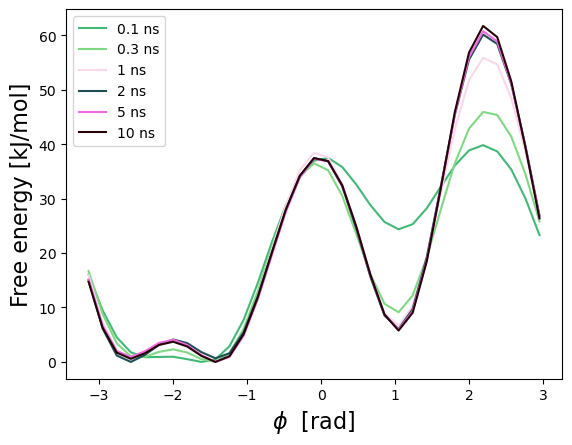

In [13]:
# Lugano exercise 2

phi = np.loadtxt("metadynamics_1/fes_1.dat",comments=["#","@"],unpack=True)[0]
fes_0_1 = np.loadtxt("metadynamics_1/fes_1.dat",comments=["#","@"],unpack=True)[1]
fes_0_3 = np.loadtxt("metadynamics_1/fes_3.dat",comments=["#","@"],unpack=True)[1]
fes_1 = np.loadtxt("metadynamics_1/fes_10.dat",comments=["#","@"],unpack=True)[1]
fes_2 = np.loadtxt("metadynamics_1/fes_20.dat",comments=["#","@"],unpack=True)[1]
fes_5 = np.loadtxt("metadynamics_1/fes_50.dat",comments=["#","@"],unpack=True)[1]
fes_10 = np.loadtxt("metadynamics_1/fes_100.dat",comments=["#","@"],unpack=True)[1]

fes_list = [fes_0_1,fes_0_3,fes_1,fes_2,fes_5,fes_10]
labels = ['0.1 ns','0.3 ns','1 ns','2 ns','5 ns','10 ns']

plt.figure()
for i in range(6):
    plt.plot(phi,fes_list[i],color = np.random.rand(3,),label=labels[i])

plt.ylabel(r'Free energy [kJ/mol]',fontsize=16)
plt.xlabel(r'$\phi$  [rad]',fontsize=16)
plt.legend()

plt.savefig('Figures/Lugano_exercise_2_1D_metadynamcs_fes_convergence.jpg')

[20.04040457 22.98183196 26.43222026 29.4840281  31.18324554 31.80018161
 31.63137772 31.67804801 31.55097286 31.27444447 30.96283238 30.66394098
 29.42542314 27.09747538 24.36547139 21.54264531 19.33419336 18.65243421]


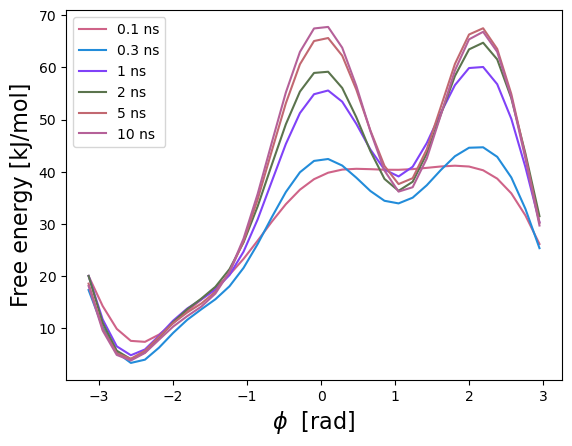

In [237]:
# phi and psi metadynamics 10 ns

nbins_phi = 33
nbins_psi = 18

phi = np.loadtxt("metadynamics_2/fes_100.dat",comments=["#","@"],unpack=True)[0][:nbins_phi]
psi = np.loadtxt("metadynamics_2/fes_100.dat",comments=["#","@"],unpack=True)[1][0::nbins_phi]
# print(phi)
#print(psi)
fes_0_1 = np.loadtxt("metadynamics_2/fes_1.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
#print(fes_0_1[:,1])
fes_0_3 = np.loadtxt("metadynamics_2/fes_3.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_1 = np.loadtxt("metadynamics_2/fes_10.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_2 = np.loadtxt("metadynamics_2/fes_20.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_5 = np.loadtxt("metadynamics_2/fes_50.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_10 = np.loadtxt("metadynamics_2/fes_100.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T

fes_list = [fes_0_1,fes_0_3,fes_1,fes_2,fes_5,fes_10]
labels = ['0.1 ns','0.3 ns','1 ns','2 ns','5 ns','10 ns']

print(fes_0_1[0])
for i in range(6):
    plt.plot(phi,fes_list[i][:,0],color = np.random.rand(3,),label=labels[i])

plt.ylabel(r'Free energy [kJ/mol]',fontsize=16)
plt.xlabel(r'$\phi$  [rad]',fontsize=16)
plt.legend()

plt.savefig('Figures/CONVERGENCE_CHECK_2Dmetad_biasfactor10_pace500_height1.2_10ns.jpg')

[20.04040457 22.98183196 26.43222026 29.4840281  31.18324554 31.80018161
 31.63137772 31.67804801 31.55097286 31.27444447 30.96283238 30.66394098
 29.42542314 27.09747538 24.36547139 21.54264531 19.33419336 18.65243421]


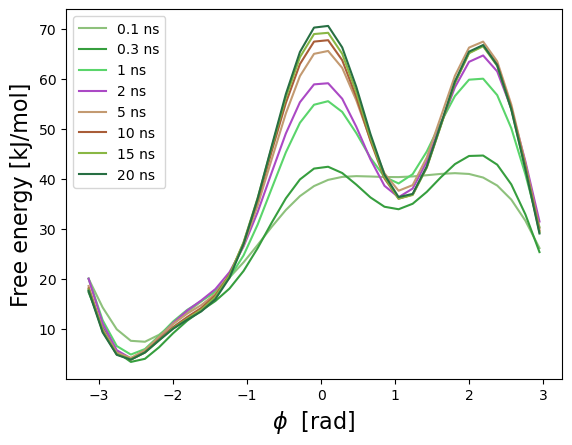

In [57]:
# phi and psi metadynamics 20 ns

nbins_phi = 33
nbins_psi = 18

phi = np.loadtxt("metadynamics_2_20ns/fes_100.dat",comments=["#","@"],unpack=True)[0][:nbins_phi]
psi = np.loadtxt("metadynamics_2_20ns/fes_100.dat",comments=["#","@"],unpack=True)[1][0::nbins_phi]
#print(phi)
#print(psi)
fes_0_1 = np.loadtxt("metadynamics_2_20ns/fes_1.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_0_3 = np.loadtxt("metadynamics_2_20ns/fes_3.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_1 = np.loadtxt("metadynamics_2_20ns/fes_10.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_2 = np.loadtxt("metadynamics_2_20ns/fes_20.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_5 = np.loadtxt("metadynamics_2_20ns/fes_50.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_10 = np.loadtxt("metadynamics_2_20ns/fes_100.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_15 = np.loadtxt("metadynamics_2_20ns/fes_150.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_20 = np.loadtxt("metadynamics_2_20ns/fes_200.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T


fes_list = [fes_0_1,fes_0_3,fes_1,fes_2,fes_5,fes_10,fes_15,fes_20]
labels = ['0.1 ns','0.3 ns','1 ns','2 ns','5 ns','10 ns','15 ns','20 ns']

print(fes_0_1[0])
for i in range(8):
    plt.plot(phi,fes_list[i][:,0],color = np.random.rand(3,),label=labels[i])

plt.ylabel(r'Free energy [kJ/mol]',fontsize=16)
plt.xlabel(r'$\phi$  [rad]',fontsize=16)
plt.legend()

[20.04040457 22.98183196 26.43222026 29.4840281  31.18324554 31.80018161
 31.63137772 31.67804801 31.55097286 31.27444447 30.96283238 30.66394098
 29.42542314 27.09747538 24.36547139 21.54264531 19.33419336 18.65243421]


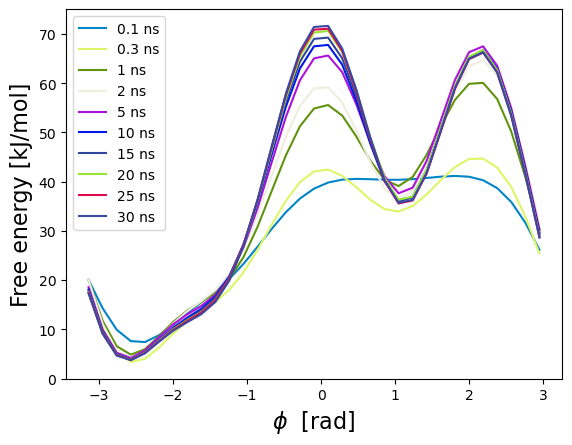

In [236]:
# phi and psi metadynamics 50 ns

nbins_phi = 33
nbins_psi = 18

phi = np.loadtxt("metadynamics_2_50ns/fes_100.dat",comments=["#","@"],unpack=True)[0][:nbins_phi]
psi = np.loadtxt("metadynamics_2_50ns/fes_100.dat",comments=["#","@"],unpack=True)[1][::nbins_phi]
#print(phi)
#print(psi.shape)
fes_0_1 = np.loadtxt("metadynamics_2_50ns/fes_1.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_0_3 = np.loadtxt("metadynamics_2_50ns/fes_3.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_1 = np.loadtxt("metadynamics_2_50ns/fes_10.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_2 = np.loadtxt("metadynamics_2_50ns/fes_20.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_5 = np.loadtxt("metadynamics_2_50ns/fes_50.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_10 = np.loadtxt("metadynamics_2_50ns/fes_100.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_15 = np.loadtxt("metadynamics_2_50ns/fes_150.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_20 = np.loadtxt("metadynamics_2_50ns/fes_200.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_25 = np.loadtxt("metadynamics_2_50ns/fes_250.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_30 = np.loadtxt("metadynamics_2_50ns/fes_300.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_35 = np.loadtxt("metadynamics_2_50ns/fes_350.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_40 = np.loadtxt("metadynamics_2_50ns/fes_400.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_45 = np.loadtxt("metadynamics_2_50ns/fes_450.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_50 = np.loadtxt("metadynamics_2_50ns/fes_500.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T


fes_list = [fes_0_1,fes_0_3,fes_1,fes_2,fes_5,fes_10,fes_15,fes_20,fes_25,fes_30,fes_35,fes_40,fes_40,fes_45,fes_50]
labels = ['0.1 ns','0.3 ns','1 ns','2 ns','5 ns','10 ns','15 ns','20 ns','25 ns','30 ns','35 ns','40 ns','45 ns','50 ns']

print(fes_0_1[0])
for i in range(10):
    plt.plot(phi,fes_list[i][:,0],color = np.random.rand(3,),label=labels[i])

plt.ylabel(r'Free energy [kJ/mol]',fontsize=16)
plt.xlabel(r'$\phi$  [rad]',fontsize=16)
plt.legend()

plt.savefig('Figures/CONVERGENCE_CHECK_2Dmetad_biasfactor10_pace500_height1.2_30ns.jpg')

[17.52577817 21.29350903 26.24860382 31.13955713 34.91755772 36.80441071
 37.5855058  38.24338052 38.49231575 38.01038116 37.29409011 36.23627601
 33.96597291 30.2799083  25.62794621 20.91235725 17.42296649 16.11596585]


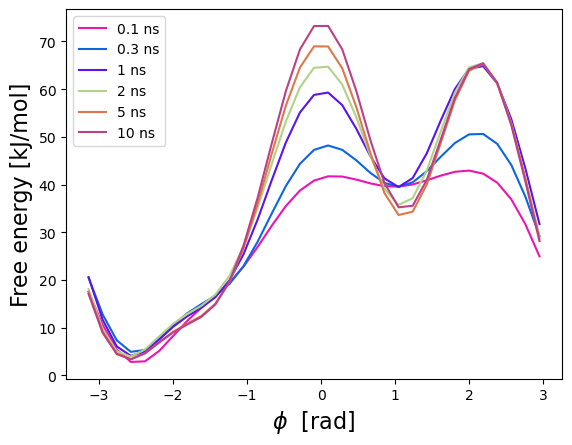

In [131]:
# phi and psi metadynamics bias factor 15, 10 ns, height 1.2

nbins_phi = 33
nbins_psi = 18

phi = np.loadtxt("metadynamics_2_bias_factor_15/fes_100.dat",comments=["#","@"],unpack=True)[0][:nbins_phi]
psi = np.loadtxt("metadynamics_2_bias_factor_15/fes_100.dat",comments=["#","@"],unpack=True)[1][0::nbins_phi]
#print(phi)
#print(psi)
fes_0_1 = np.loadtxt("metadynamics_2_bias_factor_15/fes_1.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_0_3 = np.loadtxt("metadynamics_2_bias_factor_15/fes_3.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_1 = np.loadtxt("metadynamics_2_bias_factor_15/fes_10.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_2 = np.loadtxt("metadynamics_2_bias_factor_15/fes_20.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_5 = np.loadtxt("metadynamics_2_bias_factor_15/fes_50.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_10 = np.loadtxt("metadynamics_2_bias_factor_15/fes_100.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T

fes_list = [fes_0_1,fes_0_3,fes_1,fes_2,fes_5,fes_10]
labels = ['0.1 ns','0.3 ns','1 ns','2 ns','5 ns','10 ns']

print(fes_0_1[0])
for i in range(6):
    plt.plot(phi,fes_list[i][:,0],color = np.random.rand(3,),label=labels[i])

plt.ylabel(r'Free energy [kJ/mol]',fontsize=16)
plt.xlabel(r'$\phi$  [rad]',fontsize=16)
plt.legend()

[18.08793359 22.0417032  27.5180819  32.94813376 37.03468606 39.10628623
 40.00216479 40.80708013 40.96265664 40.09407657 38.8331162  37.34872592
 35.02724114 31.2832834  26.6445439  21.82207709 18.081295   16.57003687]


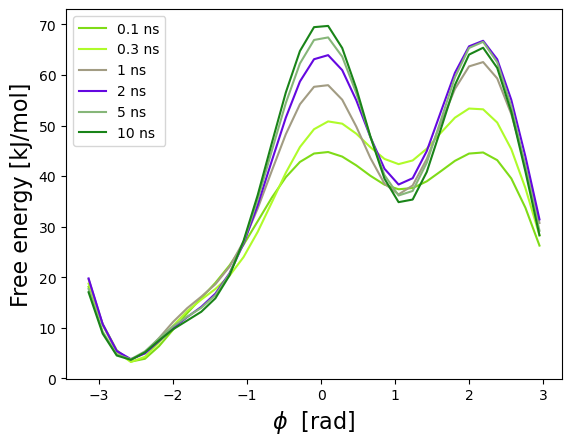

In [132]:
# phi and psi metadynamics height 2, 10 ns, bias factor 10

nbins_phi = 33
nbins_psi = 18

phi = np.loadtxt("metadynamics_2_height/fes_100.dat",comments=["#","@"],unpack=True)[0][:nbins_phi]
psi = np.loadtxt("metadynamics_2_height/fes_100.dat",comments=["#","@"],unpack=True)[1][0::nbins_phi]
#print(phi)
#print(psi)
fes_0_1 = np.loadtxt("metadynamics_2_height/fes_1.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_0_3 = np.loadtxt("metadynamics_2_height/fes_3.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_1 = np.loadtxt("metadynamics_2_height/fes_10.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_2 = np.loadtxt("metadynamics_2_height/fes_20.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_5 = np.loadtxt("metadynamics_2_height/fes_50.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T
fes_10 = np.loadtxt("metadynamics_2_height/fes_100.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T

fes_list = [fes_0_1,fes_0_3,fes_1,fes_2,fes_5,fes_10]
labels = ['0.1 ns','0.3 ns','1 ns','2 ns','5 ns','10 ns']

print(fes_0_1[0])
for i in range(6):
    plt.plot(phi,fes_list[i][:,0],color = np.random.rand(3,),label=labels[i])

plt.ylabel(r'Free energy [kJ/mol]',fontsize=16)
plt.xlabel(r'$\phi$  [rad]',fontsize=16)
plt.legend()

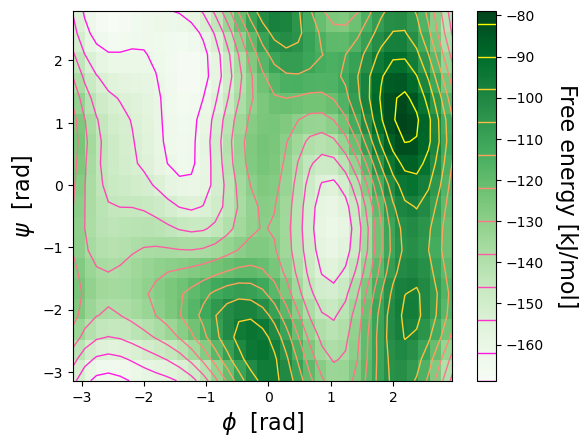

In [238]:
nbins_phi = 33
nbins_psi = 18

phi = np.loadtxt("metadynamics_2_50ns/fes.dat",comments=["#","@"],unpack=True)[0][:nbins_phi]
psi = np.loadtxt("metadynamics_2_50ns/fes.dat",comments=["#","@"],unpack=True)[1][::nbins_phi]
#print(phi)
#print(psi)
fes = np.loadtxt("metadynamics_2_50ns/fes.dat",comments=["#","@"],unpack=True)[2].reshape(nbins_psi,nbins_phi).T

x = phi.flatten()
y = psi
z = fes.T

#z_min, z_max = -np.abs(z).max(), np.abs(z).max() 

plt.figure()
c = plt.imshow(z, cmap ='Greens', origin='lower', extent =[x.min(), x.max(), y.min(), y.max()])
plt.xlabel(r'$\phi$  [rad]',fontsize=16)
plt.ylabel(r'$\psi$  [rad]',fontsize=16)
# plt.xlim([-np.pi,np.pi])
# plt.ylim([-np.pi,np.pi])

cbar = plt.colorbar(c)
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel('Free energy [kJ/mol]', rotation=270, fontsize=16)

from pylab import cm

cs = plt.contour(x,y,z,np.arange(-170,z.max(),8),linewidths=1,cmap='spring')

cbar.add_lines(cs)

plt.savefig('Figures/FES_2Dmetad_biasfactor10_pace500_height1.2_50ns.jpg')